## Rain in Australia Mini Project 2

## Context

Predicting next-day rain by training classification models on the target variable RainTomorrow.

## Content

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [166]:
df = pd.read_csv('weatherAUS.csv')

In [167]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [168]:
df.shape

(145460, 23)

In [169]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [170]:
df.describe(include='all').T

count unique         top    freq         mean        std  \
Date             145460   3436  2013-11-12      49          NaN        NaN   
Location         145460     49    Canberra    3436          NaN        NaN   
MinTemp        143975.0    NaN         NaN     NaN    12.194034   6.398495   
MaxTemp        144199.0    NaN         NaN     NaN    23.221348   7.119049   
Rainfall       142199.0    NaN         NaN     NaN     2.360918    8.47806   
Evaporation     82670.0    NaN         NaN     NaN     5.468232   4.193704   
Sunshine        75625.0    NaN         NaN     NaN     7.611178   3.785483   
WindGustDir      135134     16           W    9915          NaN        NaN   
WindGustSpeed  135197.0    NaN         NaN     NaN     40.03523  13.607062   
WindDir9am       134894     16           N   11758          NaN        NaN   
WindDir3pm       141232     16          SE   10838          NaN        NaN   
WindSpeed9am   143693.0    NaN         NaN     NaN    14.043426   8.915375   
WindSpeed3pm   142398.0    NaN         NaN     NaN    18.662657     8.8098   
Humidity9am    142806.0    NaN         NaN     NaN    68.880831  19.029164   
Humidity3pm    140953.0    NaN         NaN     NaN    51.539116  20.795902   
Pressure9am    130395.0    NaN         NaN     NaN   1017.64994    7.10653   
Pressure3pm    130432.0    NaN         NaN     NaN  1015.255889   7.037414   
Cloud9am        89572.0    NaN         NaN     NaN     4.447461   2.887159   
Cloud3pm        86102.0    NaN         NaN     NaN      4.50993   2.720357   
Temp9am        143693.0    NaN         NaN     NaN    16.990631   6.488753   
Temp3pm        141851.0    NaN         NaN     NaN     21.68339    6.93665   
RainToday        142199      2          No  110319          NaN        NaN   
RainTomorrow     142193      2          No  110316          NaN        NaN   

                 min     25%     50%     75%     max  
Date             NaN     NaN     NaN     NaN     NaN  
Location         NaN     NaN     NaN     NaN     NaN  
MinTemp         -8.5     7.6    12.0    16.9    33.9  
MaxTemp         -4.8    17.9    22.6    28.2    48.1  
Rainfall         0.0     0.0     0.0     0.8   371.0  
Evaporation      0.0     2.6     4.8     7.4   145.0  
Sunshine         0.0     4.8     8.4    10.6    14.5  
WindGustDir      NaN     NaN     NaN     NaN     NaN  
WindGustSpeed    6.0    31.0    39.0    48.0   135.0  
WindDir9am       NaN     NaN     NaN     NaN     NaN  
WindDir3pm       NaN     NaN     NaN     NaN     NaN  
WindSpeed9am     0.0     7.0    13.0    19.0   130.0  
WindSpeed3pm     0.0    13.0    19.0    24.0    87.0  
Humidity9am      0.0    57.0    70.0    83.0   100.0  
Humidity3pm      0.0    37.0    52.0    66.0   100.0  
Pressure9am    980.5  1012.9  1017.6  1022.4  1041.0  
Pressure3pm    977.1  1010.4  1015.2  1020.0  1039.6  
Cloud9am         0.0     1.0     5.0     7.0     9.0  
Cloud3pm         0.0     2.0     5.0     7.0     9.0  
Temp9am         -7.2    12.3    16.7    21.6    40.2  
Temp3pm         -5.4    16.6    21.1    26.4    46.7  
RainToday        NaN     NaN     NaN     NaN     NaN  
RainTomorrow     NaN     NaN     NaN     NaN     NaN

In [171]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [172]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [173]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [174]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int32

In [175]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int32

In [176]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int32

In [177]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [178]:
df['Location'].value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

# Fixing missing values

First of all I'm going to drop all rows where the target variable 'RainTomorrow' is null.

In [179]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [180]:
df['RainTomorrow'].isnull().sum()

0

In [181]:
#Dropping unneeded columns

#All columns look like they could be useful, so I will not drop any values for now. I will reserve judgement until I've looked at the correlation info.

I will now fill null values. 

For categorical data I will fill with the mode.

For numerical data, I will fill with the median (to minimise the impact of outliers changing the mean)

In [182]:
#Categorical fill
columns_to_fill = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for col in columns_to_fill:
    mode_value = df[col].mode()
    if not mode_value.empty:
        df[col].fillna(mode_value.iloc[0], inplace=True)


In [183]:
df['MinTemp'].fillna(df['MinTemp'].median(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].median(), inplace=True)
df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].median(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].median(), inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(), inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(), inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].median(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].median(), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].median(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].median(), inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].median(), inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].median(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].median(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].median(), inplace=True)


In [184]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [185]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          4.8       8.5           W   
1   Albury      7.4     25.1       0.0          4.8       8.5         WNW   
2   Albury     12.9     25.7       0.0          4.8       8.5         WSW   
3   Albury      9.2     28.0       0.0          4.8       8.5          NE   
4   Albury     17.5     32.3       1.0          4.8       8.5           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       5.0   
1         44.0         25.0       1010.6       1007.8       5.0       5.0   
2         38.0         30.0       1007.6       1008.7       5.0       2.0   
3         45.0         16.0       1017.6       1012.8       5.0       5.0   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  Year  Month  Day  
0     16.9     21.8        No           No  2008     12    1  
1     17.2     24.3        No           No  2008     12    2  
2     21.0     23.2        No           No  2008     12    3  
3     18.1     26.5        No           No  2008     12    4  
4     17.8     29.7        No           No  2008     12    5

## Checking Outliers

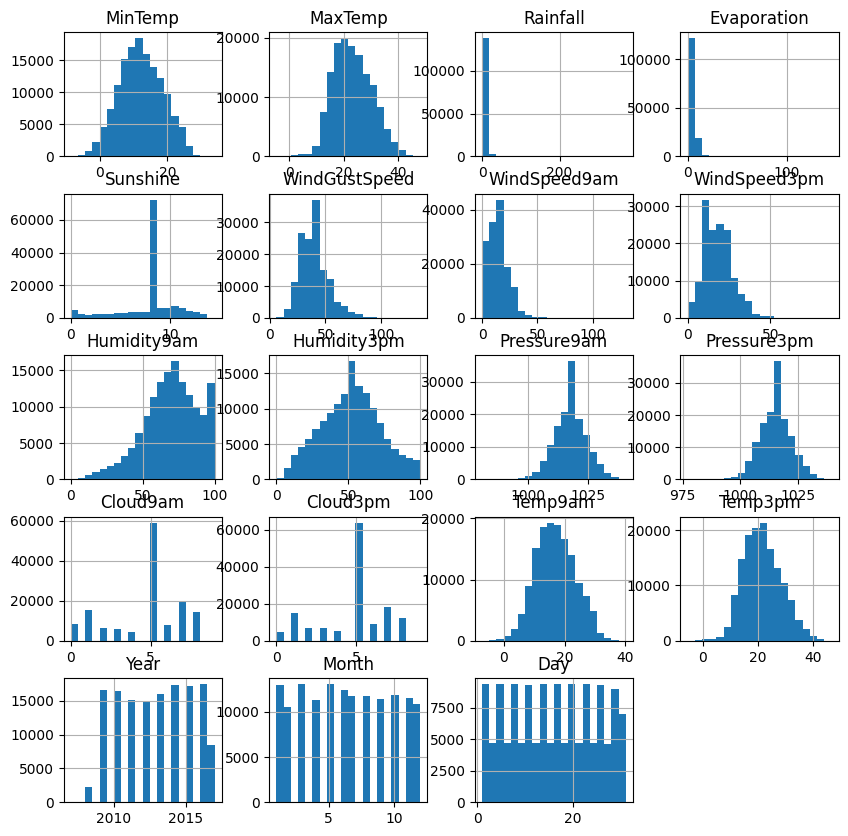

In [186]:
df.hist(bins=20,figsize=(10,10))
plt.show()

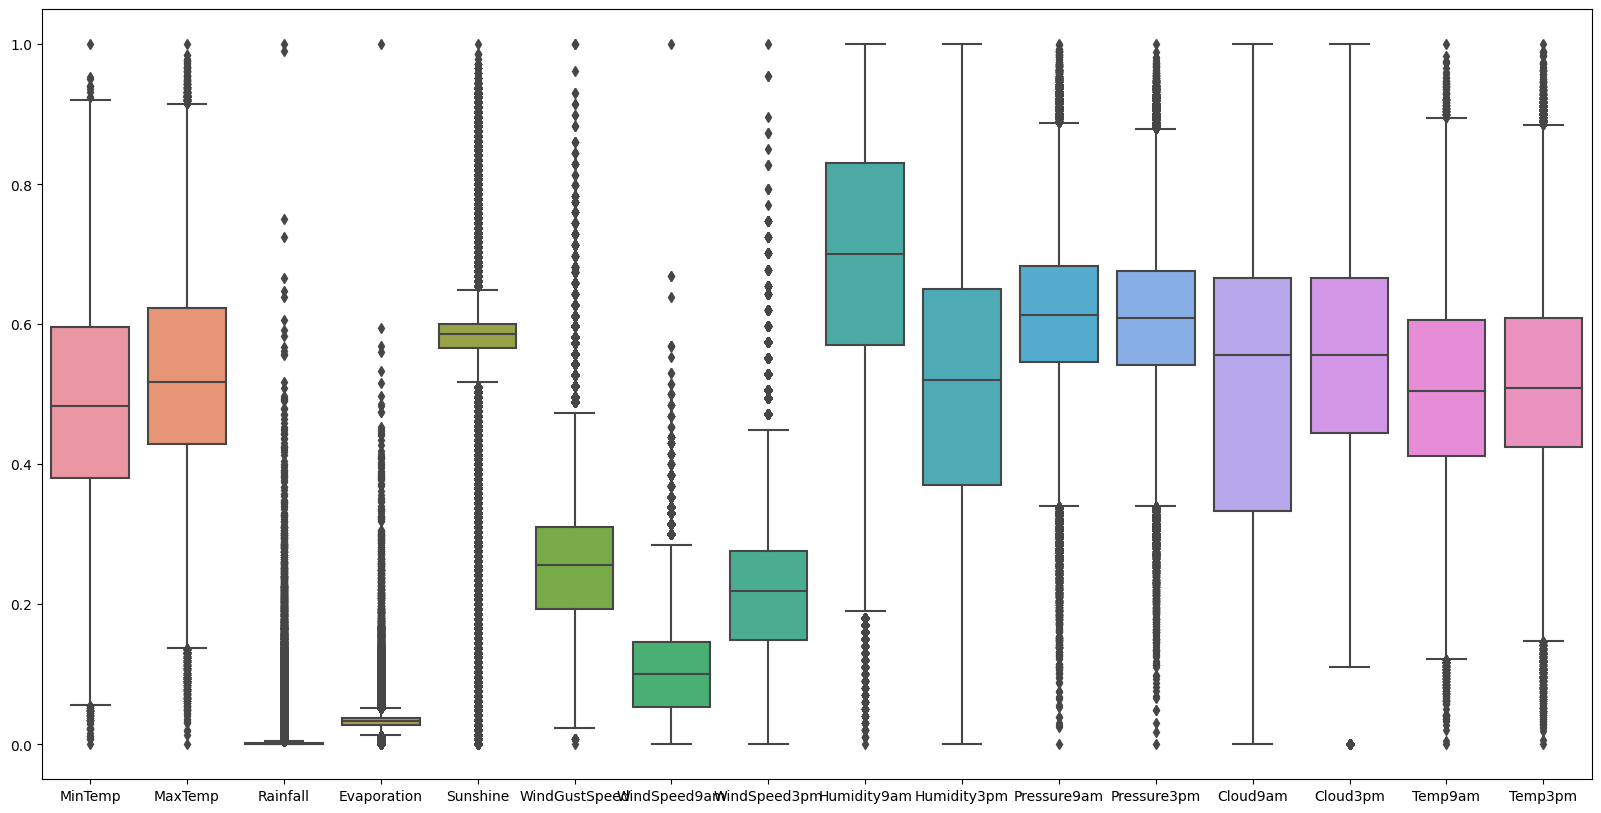

In [187]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

plt.figure(figsize=(20, 10))
sns.boxplot(data=df_scaled)
plt.show()

Looks like there are some serious outliers we will need to deal with to make sure it doesn't hinder our models.

I will use a top-coding approach to address this

In [188]:
rain_cap_value = df['Rainfall'].quantile(0.95)
evaporation_cap_value = df['Evaporation'].quantile(0.95)
wind9_cap_value = df['WindSpeed9am'].quantile(0.95)
wind3_cap_value = df['WindSpeed3pm'].quantile(0.95)

In [189]:
df['Rainfall'] = df['Rainfall'].apply(lambda x: x if x <= rain_cap_value else rain_cap_value)
df['Evaporation'] = df['Evaporation'].apply(lambda x: x if x <= evaporation_cap_value else evaporation_cap_value)
df['WindSpeed9am'] = df['WindSpeed9am'].apply(lambda x: x if x <= wind9_cap_value else wind9_cap_value)
df['WindSpeed3pm'] = df['WindSpeed3pm'].apply(lambda x: x if x <= wind3_cap_value else wind3_cap_value)

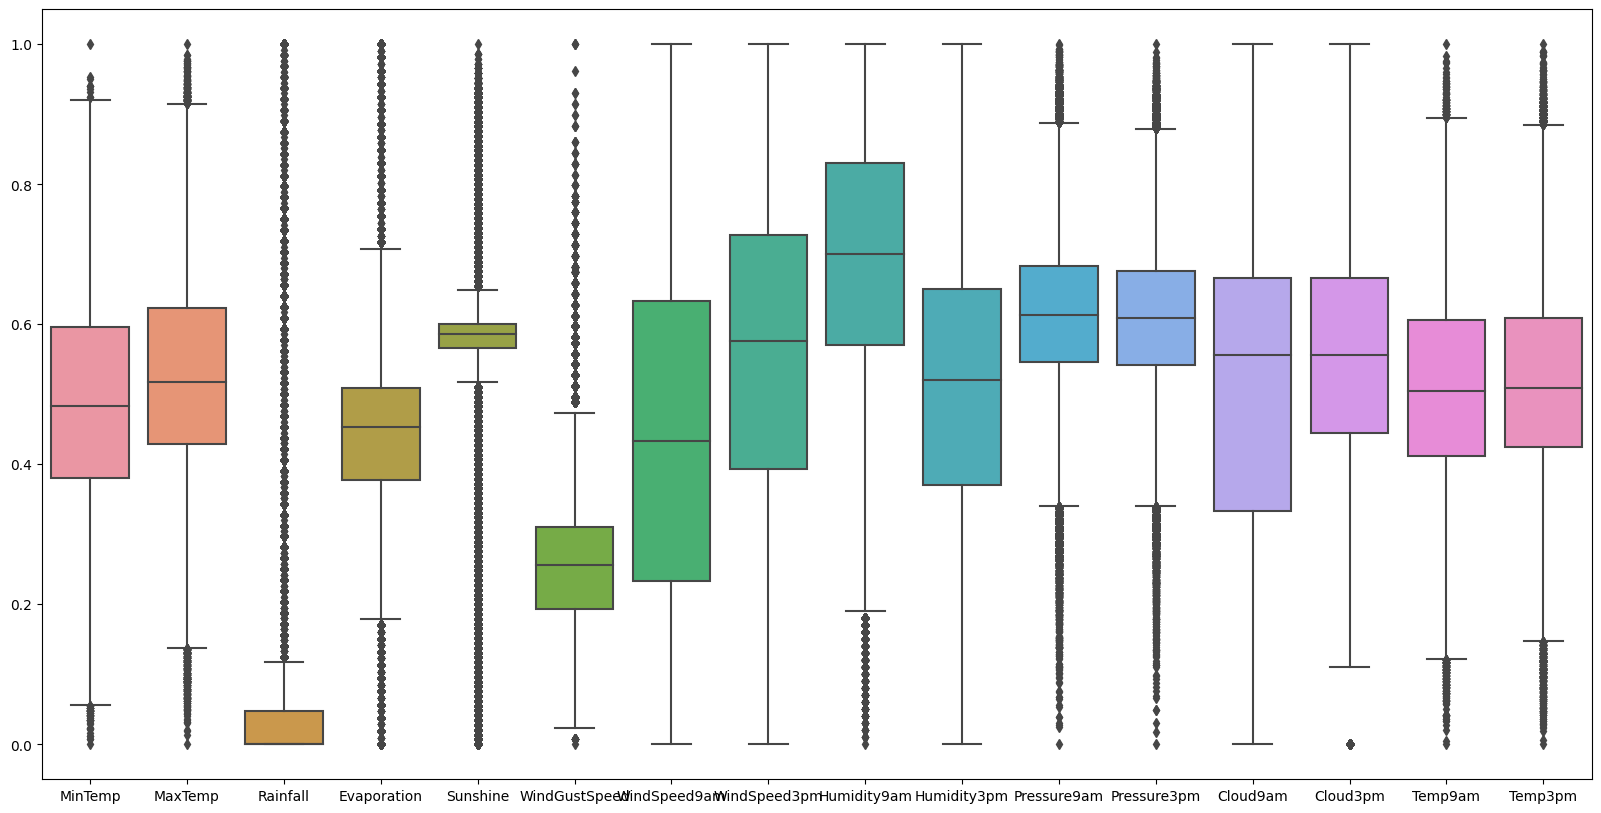

In [190]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

plt.figure(figsize=(20, 10))
sns.boxplot(data=df_scaled)
plt.show()

Looks better now :)

In [191]:
df.corr(numeric_only=True)

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.733894  0.086361     0.431784  0.030522   
MaxTemp        0.733894  1.000000 -0.170060     0.523100  0.315760   
Rainfall       0.086361 -0.170060  1.000000    -0.124308 -0.215396   
Evaporation    0.431784  0.523100 -0.124308     1.000000  0.348278   
Sunshine       0.030522  0.315760 -0.215396     0.348278  1.000000   
WindGustSpeed  0.172719  0.066930  0.158943     0.165582 -0.030410   
WindSpeed9am   0.183559  0.022140  0.097944     0.162053 -0.005948   
WindSpeed3pm   0.184133  0.059897  0.068939     0.130509  0.030923   
Humidity9am   -0.232714 -0.500179  0.317916    -0.435321 -0.330731   
Humidity3pm    0.006051 -0.499633  0.346305    -0.322636 -0.432368   
Pressure9am   -0.424056 -0.308861 -0.202322    -0.254882  0.035745   
Pressure3pm   -0.433704 -0.397168 -0.132828    -0.279482 -0.010727   
Cloud9am       0.042034 -0.233831  0.222833    -0.188368 -0.507017   
Cloud3pm      -0.000871 -0.220014  0.188277    -0.188751 -0.527751   
Temp9am        0.898129  0.880255 -0.049959     0.506236  0.190241   
Temp3pm        0.699170  0.969297 -0.174542     0.505763  0.331691   
Year           0.039139  0.058295 -0.013747     0.046325  0.044734   
Month         -0.203813 -0.164430 -0.005114    -0.021443  0.017129   
Day            0.001510 -0.000468  0.003706    -0.007118 -0.000886   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.172719      0.183559      0.184133    -0.232714   
MaxTemp             0.066930      0.022140      0.059897    -0.500179   
Rainfall            0.158943      0.097944      0.068939     0.317916   
Evaporation         0.165582      0.162053      0.130509    -0.435321   
Sunshine           -0.030410     -0.005948      0.030923    -0.330731   
WindGustSpeed       1.000000      0.561498      0.636500    -0.210104   
WindSpeed9am        0.561498      1.000000      0.495703    -0.280352   
WindSpeed3pm        0.636500      0.495703      1.000000    -0.149779   
Humidity9am        -0.210104     -0.280352     -0.149779     1.000000   
Humidity3pm        -0.027178     -0.036993      0.011180     0.660071   
Pressure9am        -0.426647     -0.212293     -0.270831     0.131517   
Pressure3pm        -0.384828     -0.163618     -0.232417     0.176081   
Cloud9am            0.045749      0.001033      0.027342     0.356913   
Cloud3pm            0.072859      0.021565      0.004295     0.279525   
Temp9am             0.146615      0.138230      0.174060    -0.471274   
Temp3pm             0.032827      0.012568      0.039333    -0.492952   
Year               -0.030372     -0.019512     -0.032225     0.010595   
Month               0.058779      0.051551      0.057845    -0.090128   
Day                -0.008865     -0.009141     -0.010724     0.015483   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.006051    -0.424056    -0.433704  0.042034 -0.000871   
MaxTemp          -0.499633    -0.308861    -0.397168 -0.233831 -0.220014   
Rainfall          0.346305    -0.202322    -0.132828  0.222833  0.188277   
Evaporation      -0.322636    -0.254882    -0.279482 -0.188368 -0.188751   
Sunshine         -0.432368     0.035745    -0.010727 -0.507017 -0.527751   
WindGustSpeed    -0.027178    -0.426647    -0.384828  0.045749  0.072859   
WindSpeed9am     -0.036993    -0.212293    -0.163618  0.001033  0.021565   
WindSpeed3pm      0.011180    -0.270831    -0.232417  0.027342  0.004295   
Humidity9am       0.660071     0.131517     0.176081  0.356913  0.279525   
Humidity3pm       1.000000    -0.025913     0.048394  0.398168  0.404751   
Pressure9am      -0.025913     1.000000     0.959879 -0.095946 -0.108336   
Pressure3pm       0.048394     0.959879     1.000000 -0.042305 -0.060248   
Cloud9am          0.398168    -0.095946    -0.042305  1.000000  0.563857   
Cloud3pm          0.404751    -0.108336    -0.060248  0.563857  1.000000   
Temp9am       

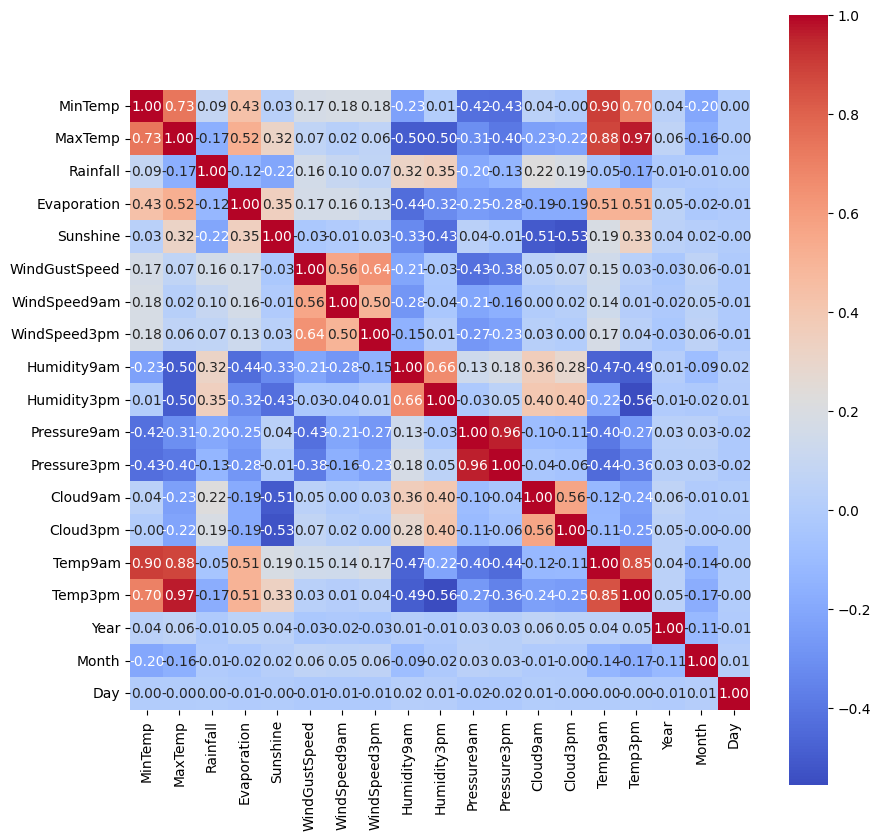

In [192]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.show()

First things that stick out to me:
- The temp columns are all very highly correlated
- Slight correlation between evaporation and temp columns
- Slight negative correlation between humidity columns and temp columns 

## Encoding categorical columns

I will now use the get_dummies function to convert my categorical data into separate numerical columns

In [193]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          4.8       8.5           W   
1   Albury      7.4     25.1       0.0          4.8       8.5         WNW   
2   Albury     12.9     25.7       0.0          4.8       8.5         WSW   
3   Albury      9.2     28.0       0.0          4.8       8.5          NE   
4   Albury     17.5     32.3       1.0          4.8       8.5           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       5.0   
1         44.0         25.0       1010.6       1007.8       5.0       5.0   
2         38.0         30.0       1007.6       1008.7       5.0       2.0   
3         45.0         16.0       1017.6       1012.8       5.0       5.0   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  Year  Month  Day  
0     16.9     21.8        No           No  2008     12    1  
1     17.2     24.3        No           No  2008     12    2  
2     21.0     23.2        No           No  2008     12    3  
3     18.1     26.5        No           No  2008     12    4  
4     17.8     29.7        No           No  2008     12    5

In [194]:
#Encoding RainToday
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['RainToday'], mapping=[{
    'col': 'RainToday',
    'mapping': {'No': 0, 'Yes': 1}}])

# Fit and transform the data
df = encoder.fit_transform(df)

df.head()


Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          4.8       8.5           W   
1   Albury      7.4     25.1       0.0          4.8       8.5         WNW   
2   Albury     12.9     25.7       0.0          4.8       8.5         WSW   
3   Albury      9.2     28.0       0.0          4.8       8.5          NE   
4   Albury     17.5     32.3       1.0          4.8       8.5           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       5.0   
1         44.0         25.0       1010.6       1007.8       5.0       5.0   
2         38.0         30.0       1007.6       1008.7       5.0       2.0   
3         45.0         16.0       1017.6       1012.8       5.0       5.0   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday RainTomorrow  Year  Month  Day  
0     16.9     21.8          0           No  2008     12    1  
1     17.2     24.3          0           No  2008     12    2  
2     21.0     23.2          0           No  2008     12    3  
3     18.1     26.5          0           No  2008     12    4  
4     17.8     29.7          0           No  2008     12    5

In [195]:
#Using get_dummies to the rest of the category 

# Creating dummy variables for the 'Category' column
loc_dummies = pd.get_dummies(df['Location'], prefix='Location').astype(int)
wind_gust_dummies = pd.get_dummies(df['WindGustDir'], prefix='WindGustDir').astype(int)
wind_dir9_dummies = pd.get_dummies(df['WindDir9am'], prefix='WindDir9am').astype(int)
wind_dir3_dummies = pd.get_dummies(df['WindDir3pm'], prefix='WindDir3pm').astype(int)

# Concatenating the original DataFrame with the dummy DataFrame
df = pd.concat([df, loc_dummies, wind_gust_dummies, wind_dir9_dummies, wind_dir3_dummies], axis=1)

#Drop the original categories as it's no longer needed
df = df.drop(['Location','WindGustDir','WindDir9am','WindDir3pm'], axis=1)


In [196]:
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          4.8       8.5           44.0   
1      7.4     25.1       0.0          4.8       8.5           44.0   
2     12.9     25.7       0.0          4.8       8.5           46.0   
3      9.2     28.0       0.0          4.8       8.5           24.0   
4     17.5     32.3       1.0          4.8       8.5           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday RainTomorrow  \
0       1007.1       8.0       5.0     16.9     21.8          0           No   
1       1007.8       5.0       5.0     17.2     24.3          0           No   
2       1008.7       5.0       2.0     21.0     23.2          0           No   
3       1012.8       5.0       5.0     18.1     26.5          0           No   
4       1006.0       7.0       8.0     17.8     29.7          0           No   

   Year  Month  Day  Location_Adelaide  Location_Albany  Location_Albury  \
0  2008     12    1                  0                0                1   
1  2008     12    2                  0                0                1   
2  2008     12    3                  0                0                1   
3  2008     12    4                  0                0                1   
4  2008     12    5                  0                0                1   

   Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
0                      0                       0                  0   
1                      0                       0                  0   
2                      0                       0                  0   
3                      0                       0                  0   
4                      0                       0                  0   

   Location_Bendigo  Location_Brisbane  Location_Cairns  Location_Canberra  \
0                 0                  0                0                  0   
1                 0                  0                0                  0   
2                 0                  0                0                  0   
3                 0                  0                0                  0   
4                 0                  0                0                  0   

   Location_Cobar  Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0               0                      0                  0                0   
1               0                      0                  0                0   
2               0                      0                  0                0   
3               0                      0                  0                0   
4               0                      0                  0                0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                   0                0                   0   
1                   0                0                   0   
2                   0                0                   0   
3                   0                0                   0   
4                   0                0                   0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                    0                   0                          0   
1                    0                   0                          0   
2                    0                   0                          0   
3                    0                   0                          0   
4                    0                   0                          0   

   Location_Mild

In [197]:
df.dtypes.value_counts()

int32      101
float64     16
object       1
Name: count, dtype: int64

The one 'object' column is my target 'RainTomorrow' column

## Modelling

Time to standardise and split my data

In [198]:
y = df['RainTomorrow']
X = df.drop(columns=['RainTomorrow'])

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.516509  0.523629  0.046875      0.45283  0.586207       0.294574   
1  0.375000  0.565217  0.000000      0.45283  0.586207       0.294574   
2  0.504717  0.576560  0.000000      0.45283  0.586207       0.310078   
3  0.417453  0.620038  0.000000      0.45283  0.586207       0.139535   
4  0.613208  0.701323  0.078125      0.45283  0.586207       0.271318   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0      0.666667      0.727273         0.71         0.22     0.449587   
1      0.133333      0.666667         0.44         0.25     0.497521   
2      0.633333      0.787879         0.38         0.30     0.447934   
3      0.366667      0.272727         0.45         0.16     0.613223   
4      0.233333      0.606061         0.82         0.33     0.500826   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  Year  \
0       0.4800  0.888889  0.555556  0.508439  0.522073        0.0   0.1   
1       0.4912  0.555556  0.555556  0.514768  0.570058        0.0   0.1   
2       0.5056  0.555556  0.222222  0.594937  0.548944        0.0   0.1   
3       0.5712  0.555556  0.555556  0.533755  0.612284        0.0   0.1   
4       0.4624  0.777778  0.888889  0.527426  0.673704        0.0   0.1   

   Month       Day  Location_Adelaide  Location_Albany  Location_Albury  \
0    1.0  0.000000                0.0              0.0              1.0   
1    1.0  0.033333                0.0              0.0              1.0   
2    1.0  0.066667                0.0              0.0              1.0   
3    1.0  0.100000                0.0              0.0              1.0   
4    1.0  0.133333                0.0              0.0              1.0   

   Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
0                    0.0                     0.0                0.0   
1                    0.0                     0.0                0.0   
2                    0.0                     0.0                0.0   
3                    0.0                     0.0                0.0   
4                    0.0                     0.0                0.0   

   Location_Bendigo  Location_Brisbane  Location_Cairns  Location_Canberra  \
0               0.0                0.0              0.0                0.0   
1               0.0                0.0              0.0                0.0   
2               0.0                0.0              0.0                0.0   
3               0.0                0.0              0.0                0.0   
4               0.0                0.0              0.0                0.0   

   Location_Cobar  Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0             0.0                    0.0                0.0              0.0   
1             0.0                    0.0                0.0              0.0   
2             0.0                    0.0                0.0              0.0   
3             0.0                    0.0                0.0              0.0   
4             0.0                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 0.0   
1                 0.0              0.0                 0.0   
2                 0.0              0.0                 0.0   
3                 0.0              0.0                 0.0   
4                 0.0              0.0                 0.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   
1                  0.0                 0.0                        0.0   
2                  0.0                 0.0                        0.0   
3                  0.0                 0.0                        0.0   
4                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Loca

In [199]:
from sklearn.model_selection import train_test_split

## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(95269, 117) (95269,)
(46924, 117) (46924,)


## Logistic Regression

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

lr = LogisticRegression(max_iter=100, solver='liblinear')


grid_search = GridSearchCV(lr, lr_params, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
lr = grid_search.best_estimator_



Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [201]:
print(best_params)

{'C': 100, 'penalty': 'l2'}


In [202]:
y_pred = lr.predict(X_test)


confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2']))

Confusion Matrix

[[34393  2073]
 [ 5128  5330]]

Accuracy: 0.85

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.80
Macro Recall: 0.73
Macro F1-score: 0.75

Weighted Precision: 0.84
Weighted Recall: 0.85
Weighted F1-score: 0.84

Classification Report

              precision    recall  f1-score   support

     Class 1       0.87      0.94      0.91     36466
     Class 2       0.72      0.51      0.60     10458

    accuracy                           0.85     46924
   macro avg       0.80      0.73      0.75     46924
weighted avg       0.84      0.85      0.84     46924



<Axes: xlabel='Predicted', ylabel='Actual'>

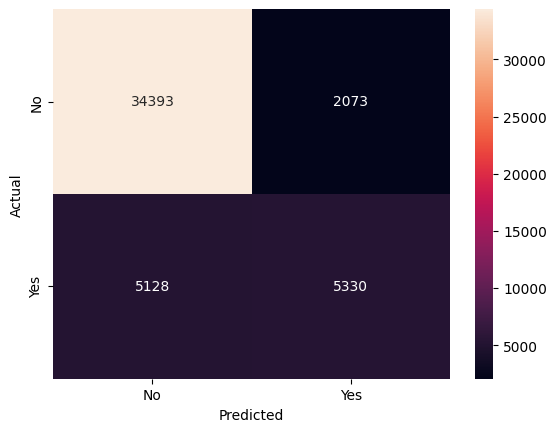

In [203]:
from sklearn import metrics

confusion_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_df, annot=True,fmt="d")

It appears there are a lot of false negatives, i.e there are a lot of days when there was actually rain but the model predicted it was less than 50% chance of rain. I will investigate lowering the threshold for predicting rain

In [204]:
from sklearn.preprocessing import binarize

for i in range(1,6):
    
    cm1=0
    
    y_pred1 = lr.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, threshold=i/10)
    
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[21245 15221]
 [  911  9547]] 

 with 30792 correct predictions,  

 15221 Type I errors( False Positives),  

 911 Type II errors( False Negatives),  

 Accuracy score:  0.6562100417696701 

 Sensitivity:  0.9128896538535093 

 Specificity:  0.5825974880710799 



With 0.2 threshold the Confusion Matrix is  

 [[28242  8224]
 [ 2136  8322]] 

 with 36564 correct predictions,  

 8224 Type I errors( False Positives),  

 2136 Type II errors( False Negatives),  

 Accuracy score:  0.7792174580172193 

 Sensitivity:  0.795754446356856 

 Specificity:  0.7744748532879943 



With 0.3 threshold the Confusion Matrix is  

 [[31387  5079]
 [ 3207  7251]] 

 with 38638 correct predictions,  

 5079 Type I errors( False Positives),  

 3207 Type II errors( False Negatives),  

 Accuracy score:  0.8234165885261273 

 Sensitivity:  0.6933448078026391 

 Specificity:  0.8607195743980695 



With 0.4 threshold the Confusion Matrix is  

 [[33220  324

The accuracy score for the default threshold of 0.5 is the highest so we'll stick with that

## SVC Model

The dataset I'm working with has a lot of data so I will avoid optimising using GridSearchCV because it takes far too long to run

In [205]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1, gamma=0.001, probability=True)
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.001, kernel='linear', probability=True)

Confusion Matrix

[[34659  1807]
 [ 5409  5049]]

Accuracy: 0.85

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.80
Macro Recall: 0.72
Macro F1-score: 0.74

Weighted Precision: 0.84
Weighted Recall: 0.85
Weighted F1-score: 0.83

Classification Report

              precision    recall  f1-score   support

     Class 1       0.87      0.95      0.91     36466
     Class 2       0.74      0.48      0.58     10458

    accuracy                           0.85     46924
   macro avg       0.80      0.72      0.74     46924
weighted avg       0.84      0.85      0.83     46924



<Axes: xlabel='Predicted', ylabel='Actual'>

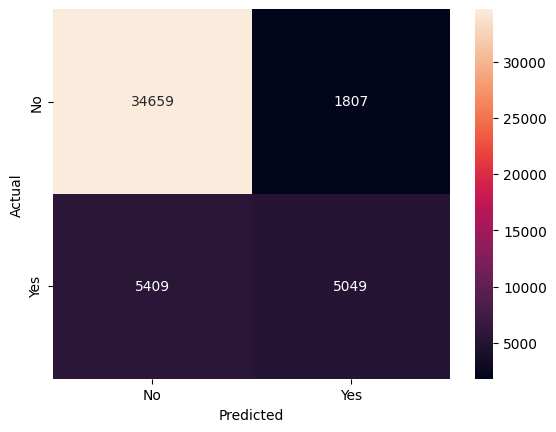

In [206]:
y_pred = svc.predict(X_test)


confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2']))

confusion_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_df, annot=True,fmt="d")

## Naive Bayes Model

In [207]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

Confusion Matrix

       0      1
0  22338  14128
1   2843   7615

Accuracy: 0.64

Micro Precision: 0.64
Micro Recall: 0.64
Micro F1-score: 0.64

Macro Precision: 0.62
Macro Recall: 0.67
Macro F1-score: 0.60

Weighted Precision: 0.77
Weighted Recall: 0.64
Weighted F1-score: 0.67

Classification Report

              precision    recall  f1-score   support

     Class 1       0.89      0.61      0.72     36466
     Class 2       0.35      0.73      0.47     10458

    accuracy                           0.64     46924
   macro avg       0.62      0.67      0.60     46924
weighted avg       0.77      0.64      0.67     46924



<Axes: xlabel='Predicted', ylabel='Actual'>

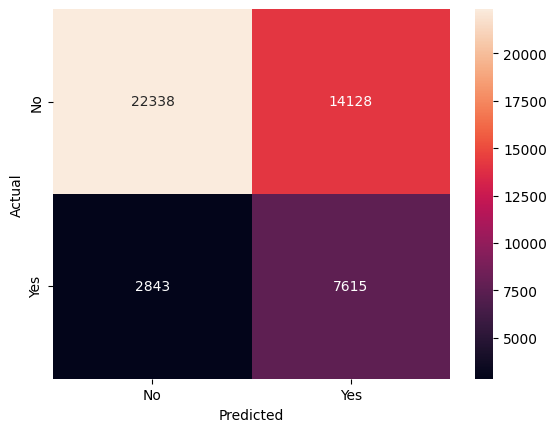

In [208]:
accuracy = accuracy_score(y_test, y_pred)

confusion = pd.DataFrame(confusion_matrix(y_test, y_pred))
print('Confusion Matrix\n')
print(confusion)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2']))

confusion_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_df, annot=True,fmt="d")

## Plotting the ROC Curve

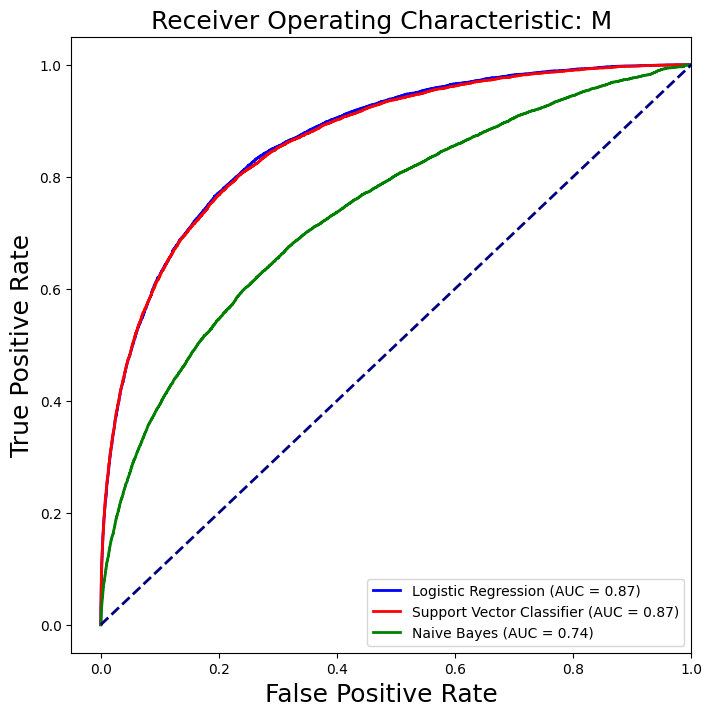

In [209]:
from sklearn.metrics import roc_curve, auc


y_scores_lr = lr.predict_proba(X_test)[:, 1]
y_scores_svc = svc.predict_proba(X_test)[:, 1]
y_scores_nb = nb.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr, pos_label='Yes')
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svc, tpr_svc, _ = roc_curve(y_test, y_scores_svc, pos_label='Yes')
roc_auc_svc = auc(fpr_svc, tpr_svc)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_scores_nb, pos_label='Yes')
roc_auc_nb = auc(fpr_nb, tpr_nb)

#plot
plt.figure(figsize=[8,8])

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_svc, tpr_svc, color='red', lw=2, label='Support Vector Classifier (AUC = %0.2f)' % roc_auc_svc)
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Plot the random guess line

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

ROC AUC of our models approaches towards 1 so can conclude our models do a reasonable job of predicting rain.

## Using LIME to explore our Logistic Regression Model

In [210]:
import lime
from lime import lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names = X_train.columns,
                                                   verbose = True,
                                                   class_names = ['No Rain', 'Rain'],
                                                    mode = 'classification')





In [211]:
exp = explainer.explain_instance(X_test.iloc[10], lr.predict_proba)
exp.show_in_notebook(show_table=True, show_all=True)

Intercept -0.14615537465148887
Prediction_local [0.62260421]
Right: 0.9702641032743105


c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


This datapoint shows there is a 97% chance of rain the next day. The 'Pressure3pm', 'Humidity', and 'WindGustSpeed' values are the main contributors to that prediction. The 'Pressure9am' and 'MaxTemp' values were the only features that lowered the probability of rain.

In [212]:
exp = explainer.explain_instance(X_test.iloc[2], lr.predict_proba)
exp.show_in_notebook(show_table=True, show_all=True)

Intercept -0.271602815839247
Prediction_local [0.23416739]
Right: 0.018186906613802897


c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


This datapoint shows there is a 98% chance that there will be NO rain the next day. Again the 'Pressure3pm' and 'Humidity3pm' values are the main factors in making that prediction. The 'Pressure9am' and 'WindGustSpeed' are the only features that indicated there might be rain, resulting in a slightly lower overall prediction.

## Conclusions

Overall, both the Logistic Regression and SVC classifiers provided similar overall performance/accuracy (both have an accuracy of 0.85 which I'd consider high). But due to the SVC model having slightly lower sensetivity (i.e. a higher rate of false negatives) my preference would be to use the Logistic Regression model to maximise the accurate predictions of rain the next day.

Also worth mentioning - The SVC model took a very long time to run (1 hour), so I'll avoid trying to use gridsearch with SVC in the future when working with large datasets like this one.